In [94]:
import torch

from models.normalizing_flow import HierarchicalNormalizingFlow

from models.planar import planar
import matplotlib.pyplot as plt
import os
import numpy as np

torch.set_grad_enabled(False)


In [64]:

flows = planar(input_dim=1, num_layers=8)

In [65]:
model = HierarchicalNormalizingFlow.load_from_checkpoint('../local_runs/run_1/epoch=118-step=1785.ckpt', flows=flows)

boundaries = (-3, 3)
resolution = 256
d = 1
normalize = False
keys = None

grid = torch.linspace(*boundaries, resolution)
d_grid = [grid] * d
meshgrid = torch.meshgrid(*d_grid, indexing="xy")
x = torch.stack(meshgrid).reshape(d, -1).permute(1, 0)
shape = [resolution] * d
prob = model.log_prob(x).exp().view(*shape)


d_grid = torch.stack(d_grid, dim=-1)

if normalize:
    d_grid = dataset.normalize_inverse(d_grid)

for d in range(d):
    
    print(d)

    if keys is not None:
        key = keys[d]
    else:
        key = d

    dimensions_to_sum = list(range(d + 1))
    dimensions_to_sum.pop(d)

    if len(dimensions_to_sum) == 0:
        marginal = prob
    else:
        marginal = prob.sum(dim=tuple(dimensions_to_sum))

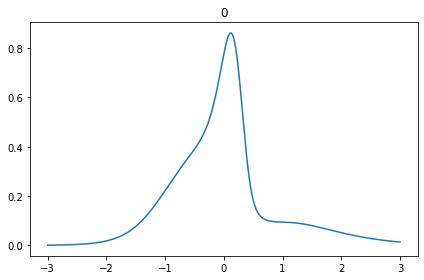

In [68]:
plt.plot(d_grid[:, d].numpy(), marginal.numpy())
plt.title(key)
plt.tight_layout()
plt.show()
plt.close()


In [106]:
import glob

In [107]:
checkpoints = []
for directory in glob.glob('../local_runs/*'):
    
    checkpoints_ = glob.glob(directory + '/*.ckpt')
    if len(checkpoints_) > 0:
        checkpoints.append(checkpoints_[0])
#     file = glob.glob(directory + '*.ckpt')
#     print(file)

In [109]:
models = checkpoints

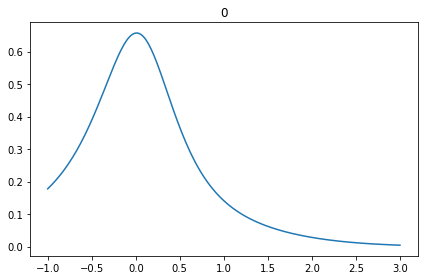

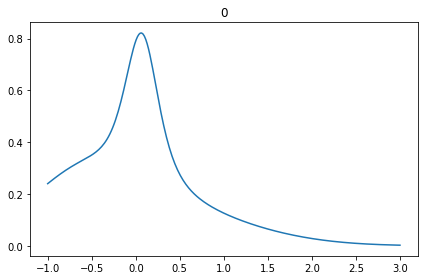

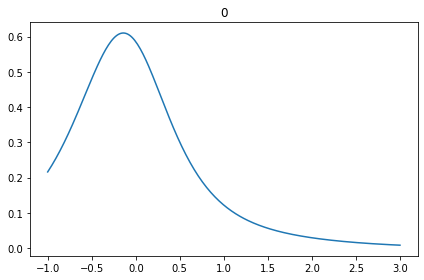

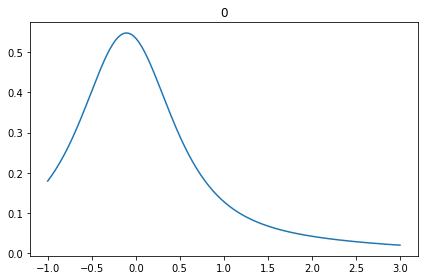

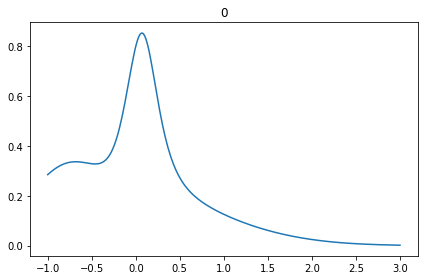

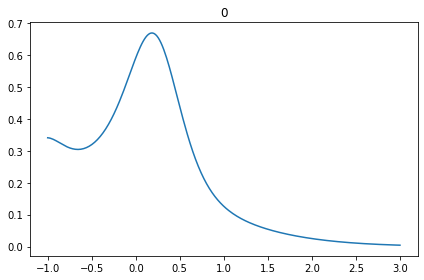

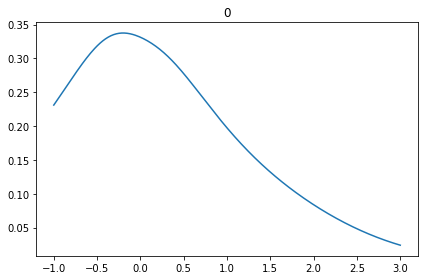

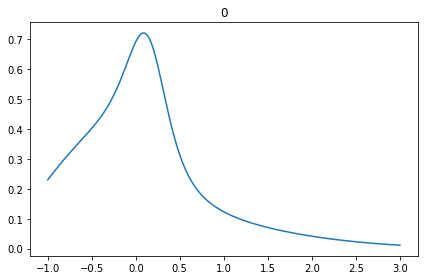

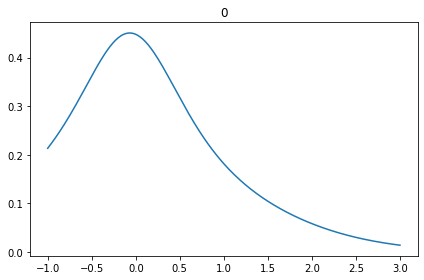

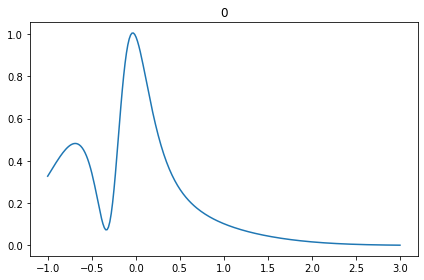

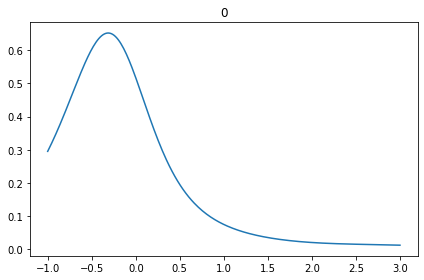

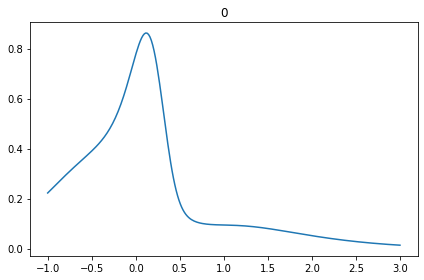

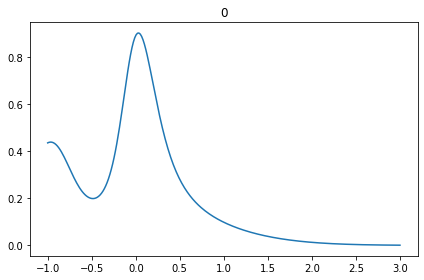

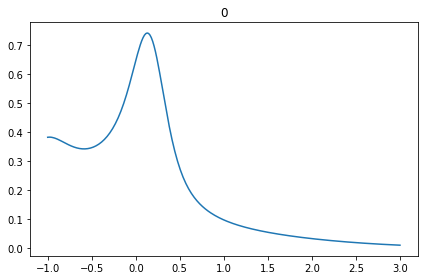

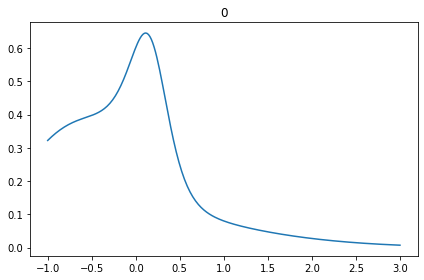

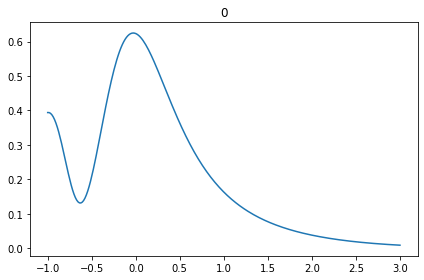

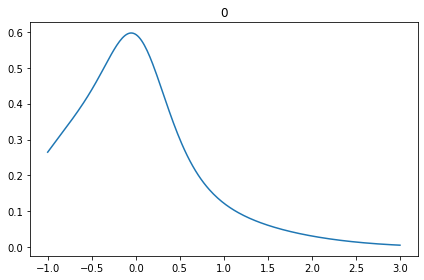

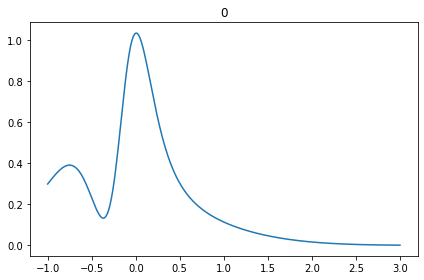

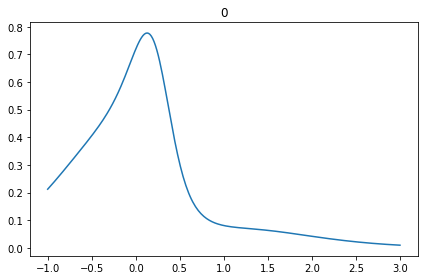

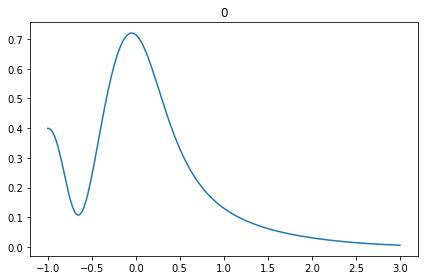

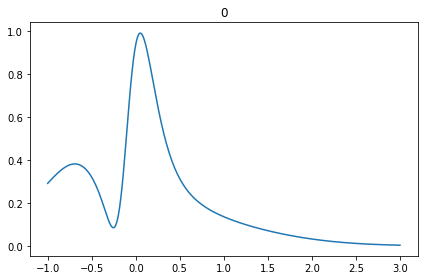

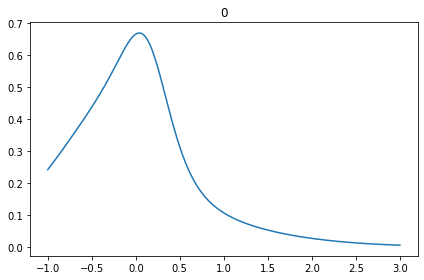

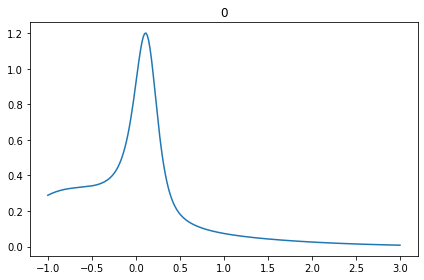

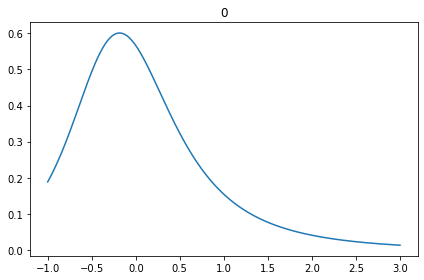

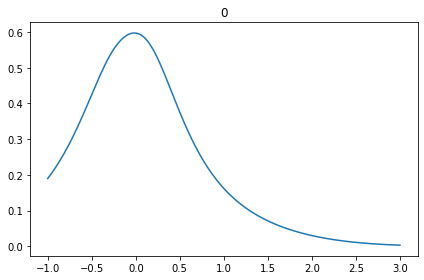

In [121]:
probabilities = []

for model_path in models:
    model = HierarchicalNormalizingFlow.load_from_checkpoint(model_path, flows=flows)

    boundaries = (-1, 3)
    resolution = 256
    d = 1
    normalize = False
    keys = None

    grid = torch.linspace(*boundaries, resolution)
    d_grid = [grid] * d
    meshgrid = torch.meshgrid(*d_grid, indexing="xy")
    x = torch.stack(meshgrid).reshape(d, -1).permute(1, 0)
    shape = [resolution] * d
    prob = model.log_prob(x).exp().view(*shape)


    d_grid = torch.stack(d_grid, dim=-1)

    if normalize:
        d_grid = dataset.normalize_inverse(d_grid)

    for d in range(d):

        if keys is not None:
            key = keys[d]
        else:
            key = d

        dimensions_to_sum = list(range(d + 1))
        dimensions_to_sum.pop(d)

        if len(dimensions_to_sum) == 0:
            marginal = prob
        else:
            marginal = prob.sum(dim=tuple(dimensions_to_sum))
        
        plt.plot(d_grid[:, d].numpy(), marginal.numpy())
        plt.title(key)
        plt.tight_layout()
        plt.show()
        plt.close()


    probabilities.append(marginal.numpy())

In [122]:
probabilities = np.stack(probabilities)

In [123]:
mean = probabilities.mean(0)
std = probabilities.std(0)

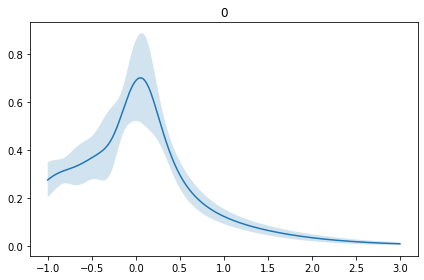

In [124]:
plt.plot(d_grid[:, d].numpy(), mean)
plt.fill_between(d_grid[:, d].numpy(), mean - std, mean + std, alpha=0.2)
plt.title(key)
plt.tight_layout()
plt.show()
plt.close()

In [125]:
from data.m1 import M1Dataset

In [126]:
dataset = M1Dataset('../datasets/Combined_GWTC_m1m2chieffz.npz', split='test')

In [127]:
x = dataset.normalize_inverse(d_grid[:, d])

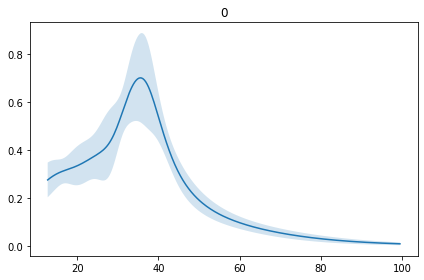

In [128]:
plt.plot(x.numpy(), mean)
plt.fill_between(x.numpy(), mean - std, mean + std, alpha=0.2)
plt.title(key)
plt.tight_layout()
plt.show()
plt.close()